In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import adam_wrangle as wra
import scipy.stats as stats

In [2]:
expanded, score, full_history = wra.get_reports_data('credit_record.csv')

In [3]:
score

,id,0-29,30-59,60-89,90-119,120-149,bad_debt,no_debt,paid_off,months_active,time_score,score
0,5001711,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,4,0,5.0
1,5001712,10.0,0.0,0.0,0.0,0.0,0.0,9.0,-0.0,19,-10,28.0
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-44.0,22,-10,-32.0
3,5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.0,15,0,-15.0
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-120.0,60,-20,-80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12.0,0.0,0.0,0.0,0.0,0.0,6.0,-0.0,18,-10,26.0
45981,5150483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-36.0,18,-10,-28.0
45982,5150484,12.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,13,0,26.0
45983,5150485,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,2,0,4.0


In [4]:
full_history

,id,account_months,status,1month_ago,2month_ago,3month_ago,4month_ago,5month_ago,6month_ago,7month_ago,...,51month_ago,52month_ago,53month_ago,54month_ago,55month_ago,56month_ago,57month_ago,58month_ago,59month_ago,60month_ago
0,5001711,3,0,0,0,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001712,18,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001713,21,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001714,14,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001715,59,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,28,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45981,5150483,17,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45982,5150484,12,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45983,5150485,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
apps = wra.get_application_data('application_record.csv')

In [6]:
apps_cred, apps_none = wra.add_score_target(apps, score)

In [7]:
apps_cred = wra.add_apps_dummies(apps_cred)

In [8]:
train, validate, test = wra.split_data(apps_cred)

In [9]:
train.shape, validate.shape, test.shape

((26248, 61), (6563, 61), (3646, 61))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26248 entries, 32073 to 18632
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 26248 non-null  object 
 1   code_gender                                        26248 non-null  object 
 2   flag_own_car                                       26248 non-null  int64  
 3   flag_own_realty                                    26248 non-null  int64  
 4   cnt_children                                       26248 non-null  int64  
 5   amt_income_total                                   26248 non-null  float64
 6   name_income_type                                   26248 non-null  object 
 7   name_education_type                                26248 non-null  object 
 8   name_family_status                                 26248 non-null  object 
 9   na

In [11]:
train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,occupation_type_low-skill_laborers,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff
32073,5135805,F,0,1,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
31598,5132791,F,0,1,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
24158,5096773,F,0,0,0,171000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,1,0,0,0,0,0,0
34581,5146247,F,0,1,0,238500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,1,0,0,0,0,0,0
16771,5067027,F,0,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,1


In [12]:
train.code_gender.value_counts()

F    17578
M     8670
Name: code_gender, dtype: int64

Text(0.5, 0, 'Number of Applicants')

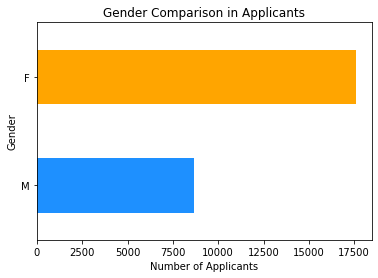

In [13]:
train.code_gender.value_counts().sort_values().plot(kind = 'barh', color = ['dodgerblue', 'orange'])
plt.title('Gender Comparison in Applicants')
plt.ylabel('Gender')
plt.xlabel('Number of Applicants')

### Is there a relationship between gender and score?

In [14]:
# Average score amongst males
train[train.code_gender == 'M'].score.mean()

25.482698961937718

In [15]:
train[train.code_gender == 'M'].score.describe()

count    8670.000000
mean       25.482699
std        31.977172
min       -81.000000
25%         7.000000
50%        24.000000
75%        43.000000
max       308.000000
Name: score, dtype: float64

In [16]:
# Average score amongst females
train[train.code_gender == 'F'].score.mean()

26.2864375924451

In [17]:
train[train.code_gender == 'F'].score.describe()

count    17578.000000
mean        26.286438
std         31.566673
min        -81.000000
25%          7.000000
50%         24.000000
75%         44.000000
max        316.000000
Name: score, dtype: float64

### Is there a relationship between gender and car ownership?

In [18]:
# Average car ownership amongst males
train[train.code_gender == 'M'].flag_own_car.mean()

0.6328719723183391

In [19]:
# Average car ownership amongst females
train[train.code_gender == 'F'].flag_own_car.mean()

0.2590738423028786

Males appear to own cars at a higher rate than females. We can validate this observation with a t-test:

$H_0$: There is no difference in car ownership rates among males and females.  
$H_0$: There is a difference in car ownership rates among males and females.

In [20]:
alpha = 0.05
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].flag_own_car, train[train.code_gender == 'F'].flag_own_car)
stat, p

(62.86030910495491, 0.0)

In [21]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males own cars at a higher rate than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males own cars at a higher rate than females.


### Is there a relationship between gender and realty ownership?

In [22]:
# Average home ownership amongst males
train[train.code_gender == 'M'].flag_own_realty.mean()

0.6351787773933103

In [23]:
# Average home ownership amongst females
train[train.code_gender == 'F'].flag_own_realty.mean()

0.6912618045283877

The difference in home ownership is much smaller. Females appear to own realty at a higher rate than males. We can validate this observation with a t-test.

$H_0$: There is no difference in home ownership rates among males and females.  
$H_a$: There is a difference in home ownership rates among males and females.

In [24]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].flag_own_realty, train[train.code_gender == 'F'].flag_own_realty)
stat, p

(-9.121731168305445, 7.90870957751874e-20)

In [25]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males own realty at a lower rate than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males own realty at a lower rate than females.


### Is there a relationship between gender and the number of children?

In [26]:
# Average number of children amongst males
train[train.code_gender == 'M'].cnt_children.mean()

0.5144175317185697

In [27]:
# Average number of children amongst females
train[train.code_gender == 'F'].cnt_children.mean()

0.3898054386164524

Male applicants appear to have more children than female applicants. We can validate this with a t-test:

$H_0$: There is no difference in the number of children between males and females  
$H_a$: There is a difference in the number of children between males and females

In [28]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].cnt_children, train[train.code_gender == 'F'].cnt_children)
stat, p

(12.774463700132197, 2.9405943277508216e-37)

In [29]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males have more children than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males have more children than females.


### Is there a relationship between gender and income?

In [30]:
# Average income amongst males
train[train.code_gender == 'M'].amt_income_total.mean()

215281.50778546714

In [31]:
# Average income amongst females
train[train.code_gender == 'F'].amt_income_total.mean()

172342.6243315508

In [32]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].amt_income_total, train[train.code_gender == 'F'].amt_income_total)
stat, p

(33.08854247455069, 2.9630620855135665e-235)

In [33]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males have more income than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males have more income than females.


### Is there a relationship between gender and income type?

In [34]:
# Create a crosstab of gender and income type
gender_income_type = pd.crosstab(train.code_gender, train.name_income_type)

# Visualize intial crosstab
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working
code_gender,,,,,
F,3993,3748,1575,9,8253
M,2115,673,575,1,5306


In [35]:
# Convert counts to percentages by column
gender_income_type['Commercial associate'] = (gender_income_type['Commercial associate'] / gender_income_type['Commercial associate'].sum() * 100)
gender_income_type['Pensioner'] = (gender_income_type['Pensioner'] / gender_income_type['Pensioner'].sum() * 100)
gender_income_type['State servant'] = (gender_income_type['State servant'] / gender_income_type['State servant'].sum() * 100)
gender_income_type['Student'] = (gender_income_type['Student'] / gender_income_type['Student'].sum() * 100)
gender_income_type['Working'] = (gender_income_type['Working'] / gender_income_type['Working'].sum() * 100)

# Visualize modified crosstab
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working
code_gender,,,,,
F,65.373281,84.7772,73.255814,90.0,60.867321
M,34.626719,15.2228,26.744186,10.0,39.132679


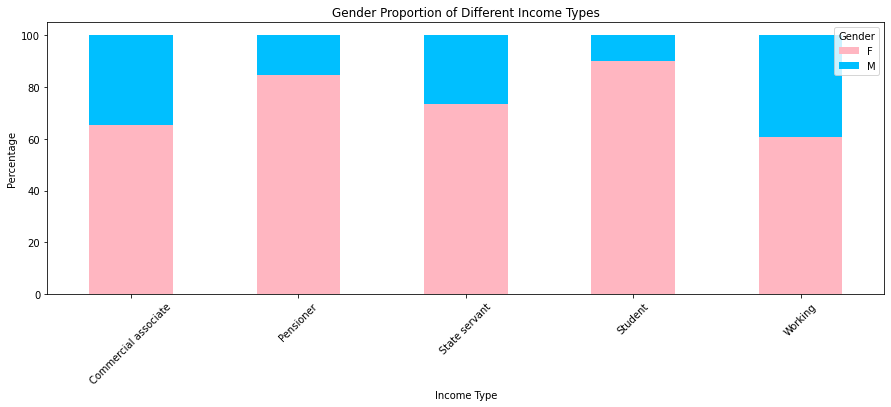

In [36]:
# Visualize percentages as stacked bar for each gender
gender_income_type[['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']].T.plot(kind='bar', stacked=True, color = ['lightpink', 'deepskyblue'], figsize=(15,5))

# Add title text
plt.title('Gender Proportion of Different Income Types')

# Add y-axis label
plt.ylabel('Percentage')

# Change orientation of x-tick labels for easier reading
plt.xticks(rotation=45)

# Add x-axis label
plt.xlabel('Income Type')

# Clarify label title
plt.legend(title='Gender')

# Show chart
plt.show()

In [37]:
# Create a crosstab of gender and income type
gender_income_type = pd.crosstab(train.code_gender, train.name_income_type) 

# Create a new column that is the sum of each row
gender_income_type.loc[:,'Total'] = gender_income_type.sum(axis=1) 

# Convert quantities into percentages by row
gender_income_type['Commercial associate'] = (gender_income_type['Commercial associate'] / gender_income_type['Total'] * 100)
gender_income_type['Pensioner'] = (gender_income_type['Pensioner'] / gender_income_type['Total'] * 100)
gender_income_type['State servant'] = (gender_income_type['State servant'] / gender_income_type['Total'] * 100)
gender_income_type['Student'] = (gender_income_type['Student'] / gender_income_type['Total'] * 100)
gender_income_type['Working'] = (gender_income_type['Working'] / gender_income_type['Total'] * 100)

# View the dataframe
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working,Total
code_gender,,,,,,
F,22.715895,21.322107,8.960064,0.051200,46.950734,17578
M,24.394464,7.762399,6.632065,0.011534,61.199539,8670


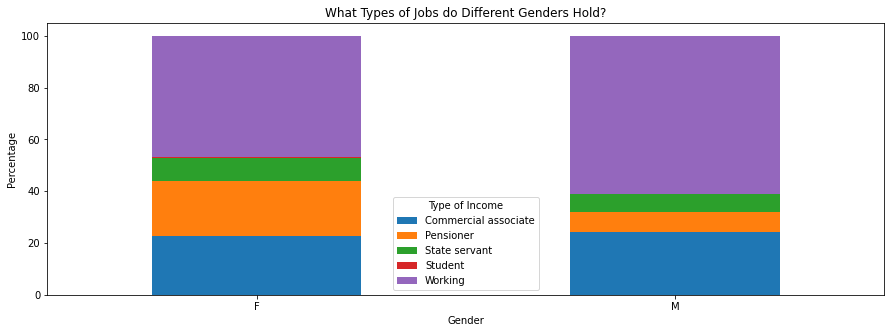

In [38]:
# Visualize percentages as stacked bar for each gender
gender_income_type[['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']].plot(kind='bar', stacked=True, figsize=(15,5))

# Add title text
plt.title('What Types of Jobs do Different Genders Hold?')

# Add y-axis label
plt.ylabel('Percentage')

# Change orientation of x-tick labels for easier reading
plt.xticks(rotation=0)

# Add x-axis label
plt.xlabel('Gender')

# Clarify label title
plt.legend(title='Type of Income')

# Show chart
plt.show()

From visual perspective, it appears that women are more often Pensioners than men and men are more often Working than women. We can confirm this with a chi-squared analysis:

In [39]:
gender_income_type_pensioner_working = pd.crosstab(train.code_gender, train.name_income_type)[['Pensioner', 'Working']]
gender_income_type_pensioner_working

name_income_type,Pensioner,Working
code_gender,,
F,3748,8253
M,673,5306


In [40]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(gender_income_type_pensioner_working)

print('Observed\n')
print(gender_income_type_pensioner_working.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3748 8253]
 [ 673 5306]]
---
Expected

[[2950.85767519 9050.14232481]
 [1470.14232481 4508.85767519]]
---

chi^2 = 857.6333
p     = 0.0000
